In [1]:
# Data 
import pandas as pd

# visualization
from matplotlib import pyplot as plt
from matplotlib.cm import get_cmap

# ML
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from mlxtend.evaluate import bias_variance_decomp
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('../../data/processed/ive_d_close').drop(columns='Unnamed: 0')
df['date'] = pd.to_datetime(df['date'])
df.rename(columns={"close":"IVE","US05Y, TVC: Close": "US05Y","US10Y, TVC: Close":"US10Y","US30Y, TVC: Close":"US30Y"}, inplace=True)
df = df[df['US30Y'].notna()]

In [3]:
##-------------------------------------------- Helpers-------------------------------------------------------##

def fit_poly(X,y,k):
    # Transforms our data to allow for Polynomial regression (Matrix from last class)
    poly = PolynomialFeatures(k)
    X_poly = poly.fit_transform(X.reshape(-1,1))
    # Linear Regression Model
    lr = LinearRegression()
    lr.fit(X_poly,y)
    return lr

def polinomial2_regression (X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=2)

    # Calling
    lr = fit_poly(X_train,y_train,2)

    # Variables regression 

    # The function
    b0,b1,b2 = lr.coef_
    b0 = lr.intercept_
    lr_func = lambda x: b0*x**0 + b1*x**1 + b2*x**2
    
    pre_process = PolynomialFeatures(degree=2)
    test_y_pred = lr.predict(pre_process.fit_transform(X_test))

    r2_test = r2_score(y_true=y_test, y_pred=test_y_pred )
    
    return (r2_test,lr.intercept_,lr.coef_,lr_func)

def plotplinomial2_regression(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=2)
    # Callin
    lr = fit_poly(X_train,y_train,2)
    # Variables regression
    # The functio
    b0,b1,b2 = lr.coef_
    b0 = lr.intercept_
    lr_func = lambda x: b0*x**0 + b1*x**1 + b2*x**2
    # plotting on train
    return plt.plot(X, lr_func(X))
                                                

In [4]:

### Definit lag #####
leading1 = df[['US30Y']][:-12]
lagged1 = df['IVE'][12:]

In [5]:
##### No Lagg #####
X, y = leading1.values,lagged1.values
polinomial2_regression (X, y);


In [7]:
####  Evolution accross lagg ####

regression =[]
for lagg in range (1,90):
    regression.append((lagg, polinomial2_regression(df[['US30Y']][:-lagg].values, df['IVE'][lagg:].values)))

# r2
r2 = pd.DataFrame([[regression[ele][0],regression[ele][1][0]] for ele in range (0,89)])
r2.rename(columns = {0:'lagg',1:'R2'}, inplace=True)
r2.set_index(r2['lagg'],inplace=True)

# lr intercept
lr_intercept = pd.DataFrame([[regression[ele][0],regression[ele][1][1]] for ele in range (0,89)])
lr_intercept.rename(columns = {0:'lagg',1:'lr_intercept'}, inplace=True)
lr_intercept.set_index(lr_intercept['lagg'],inplace=True)

# coefs
coefs = pd.DataFrame([[regression[ele][0],regression[ele][1][2]] for ele in range (0,89)])
coefs.rename(columns = {0:'lagg',1:'coefs'}, inplace=True)
coefs.set_index(coefs['lagg'],inplace=True)

# lr_func
lr_func=[regression[ele][1][3] for ele in range (0,89)]

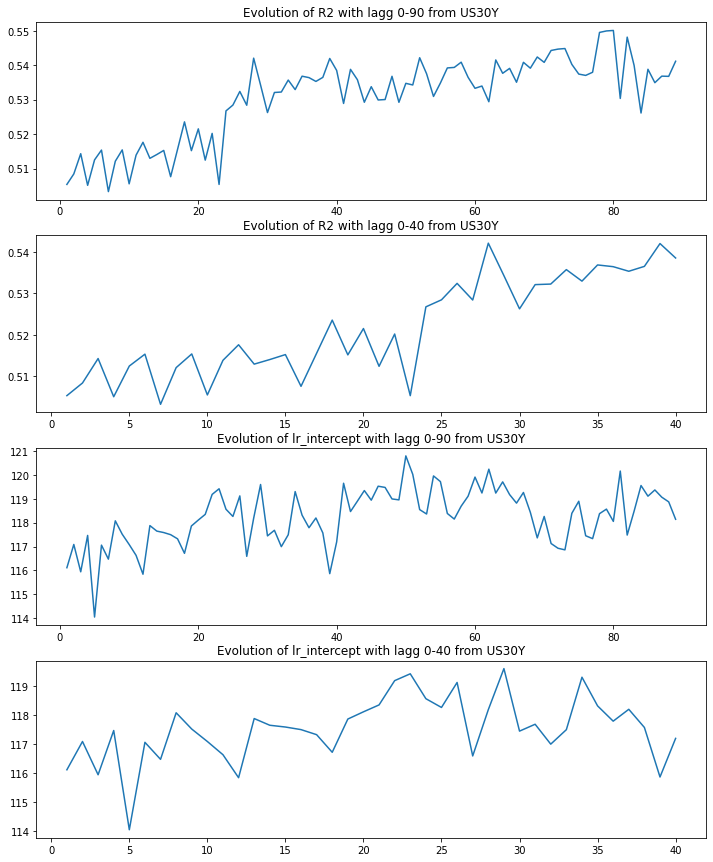

In [8]:
fig, ax = plt.subplots(4,figsize=(12,15))

#r2
ax[0].plot(r2['R2'])
ax[0].set_title('Evolution of R2 with lagg 0-90 from US30Y')
ax[1].plot(r2['R2'][0:40])
ax[1].set_title('Evolution of R2 with lagg 0-40 from US30Y')

# lr_intercept
ax[2].plot(lr_intercept['lr_intercept'])
ax[2].set_title('Evolution of lr_intercept with lagg 0-90 from US30Y')
ax[3].plot(lr_intercept['lr_intercept'][0:40])
ax[3].set_title('Evolution of lr_intercept with lagg 0-40 from US30Y');


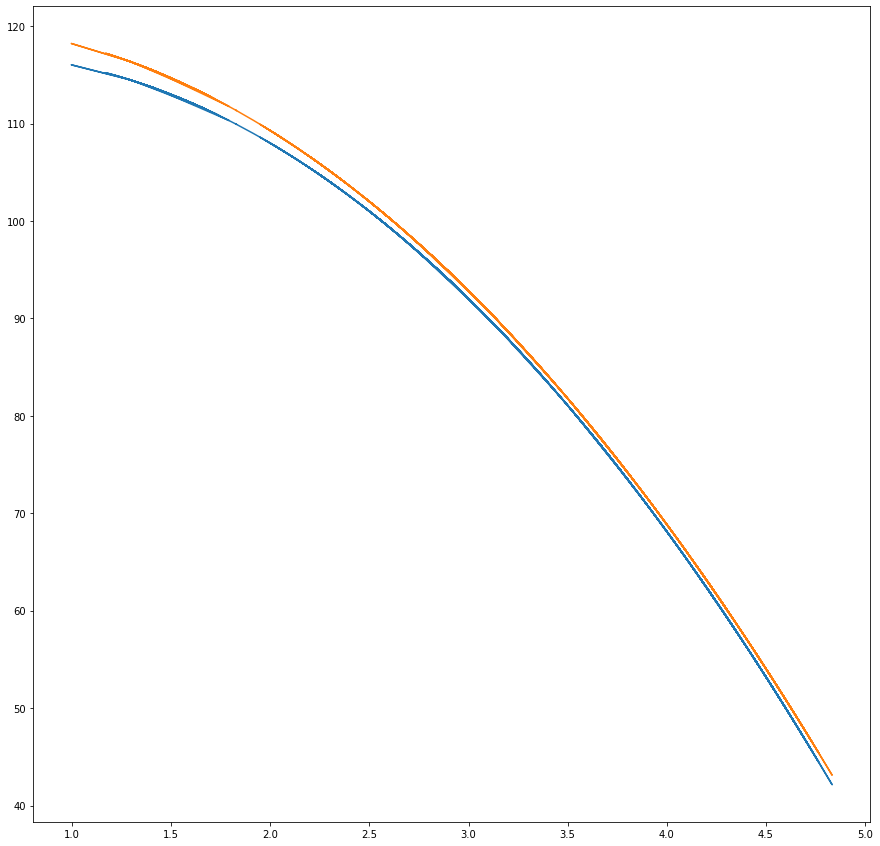

In [9]:
plt.rcParams["figure.figsize"] = (15,15)
for lagg in range (1,30,28):
    plotplinomial2_regression(df[['US30Y']][:-lagg].values, df['IVE'][lagg:].values)

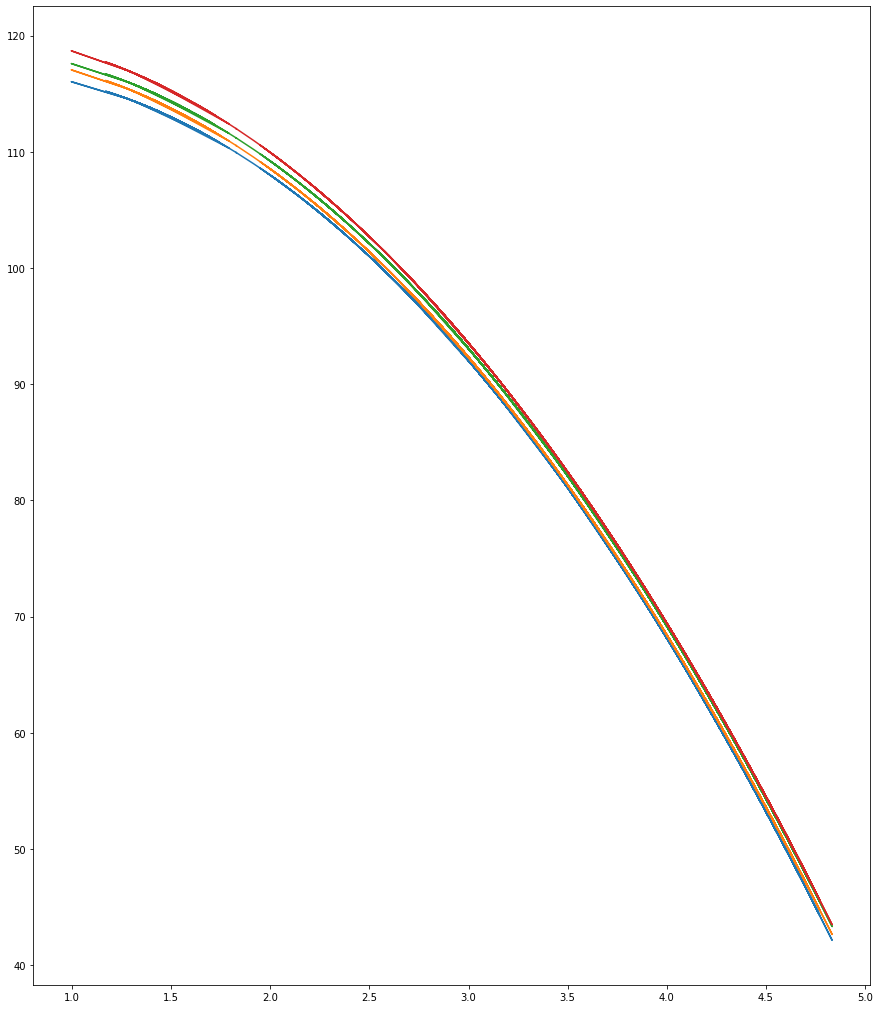

In [10]:
plt.rcParams["figure.figsize"] = (15,18)
for lagg in range (1,60, 18):
    plotplinomial2_regression(df[['US30Y']][:-lagg].values, df['IVE'][lagg:].values)


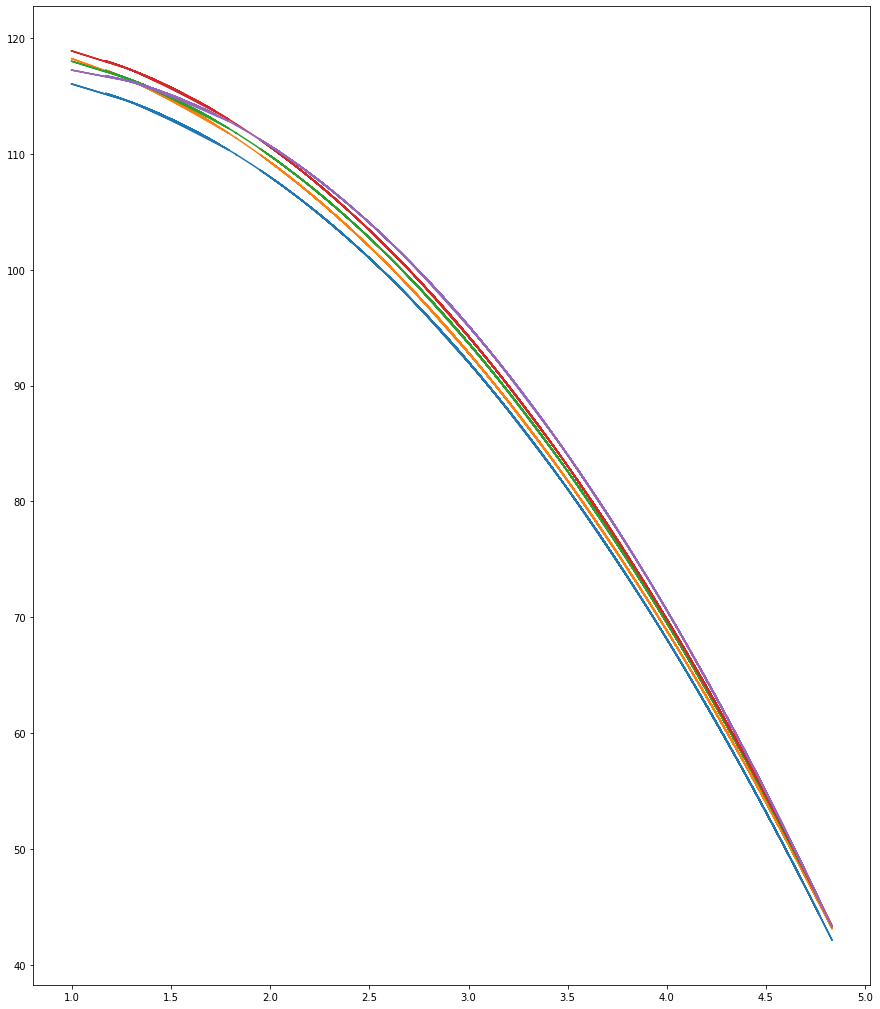

In [11]:
plt.rcParams["figure.figsize"] = (15,18)
for lagg in range (1,120, 28):
    plotplinomial2_regression(df[['US30Y']][:-lagg].values, df['IVE'][lagg:].values)

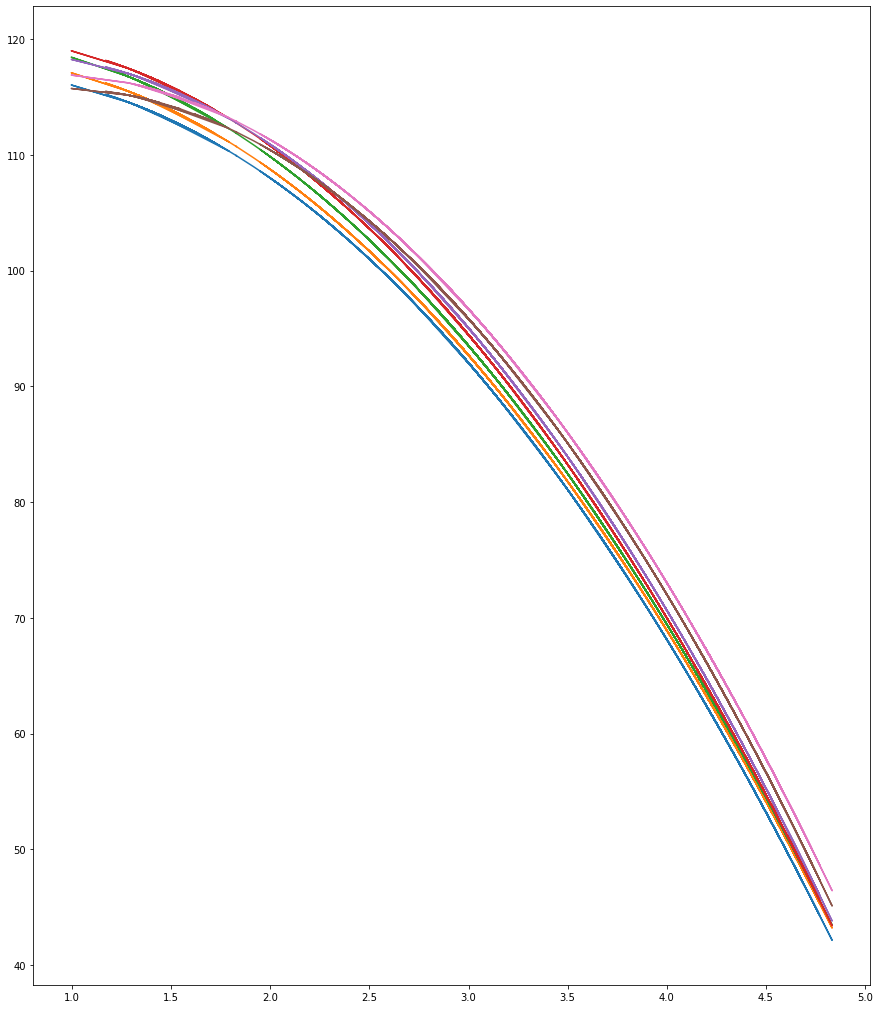

In [12]:
plt.rcParams["figure.figsize"] = (15,18)
for lagg in range (1,200, 30):
    plotplinomial2_regression(df[['US30Y']][:-lagg].values, df['IVE'][lagg:].values)

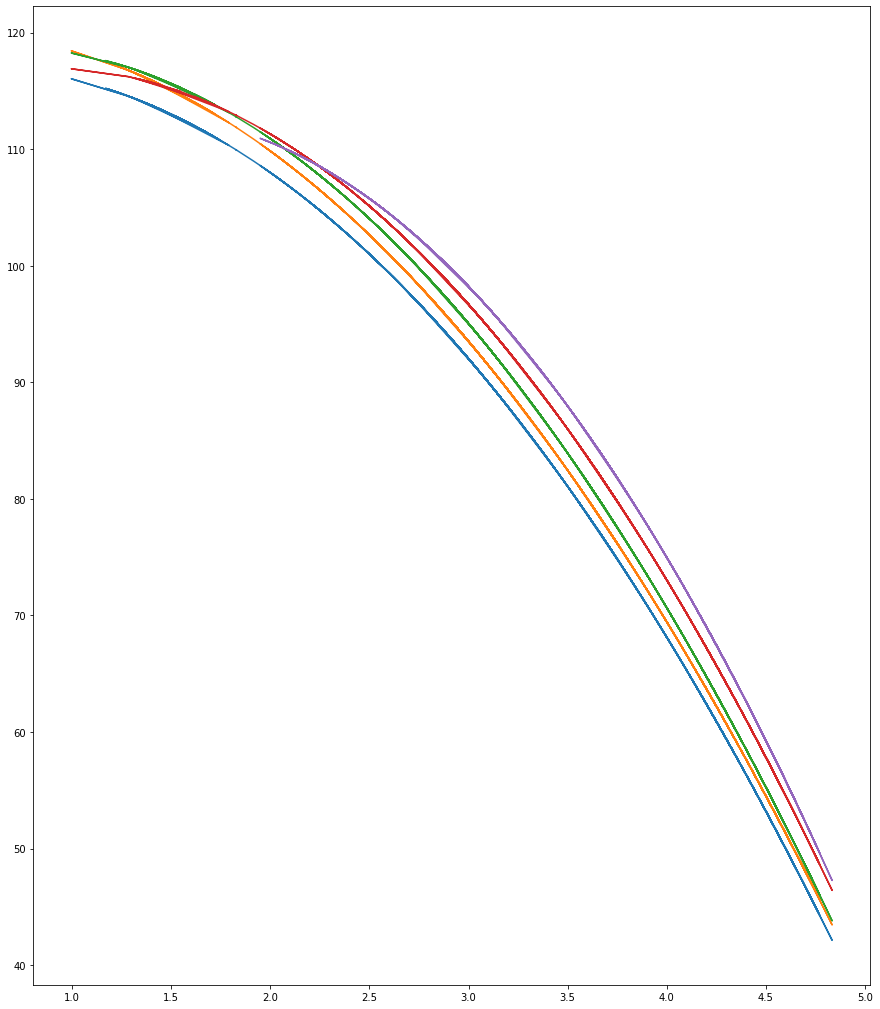

In [13]:
plt.rcParams["figure.figsize"] = (15,18)
for lagg in range (1,300, 60):
    plotplinomial2_regression(df[['US30Y']][:-lagg].values, df['IVE'][lagg:].values)

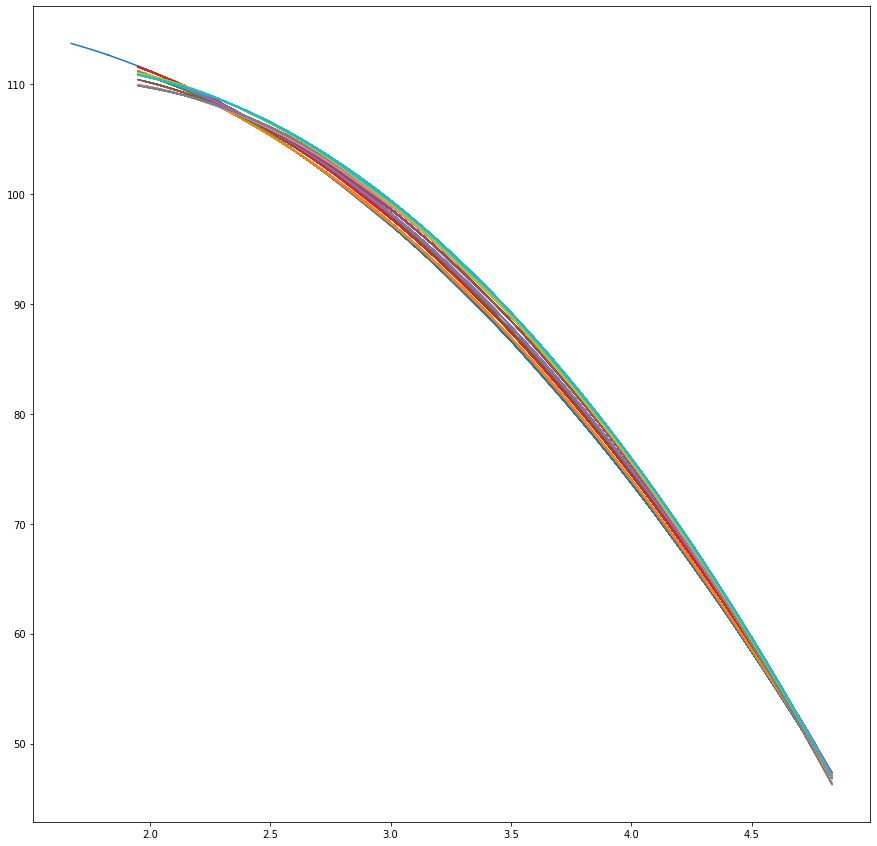

In [14]:
plt.rcParams["figure.figsize"] = (15,15)
for lagg in range (200,300, 10):
    plotplinomial2_regression(df[['US30Y']][:-lagg].values, df['IVE'][lagg:].values)

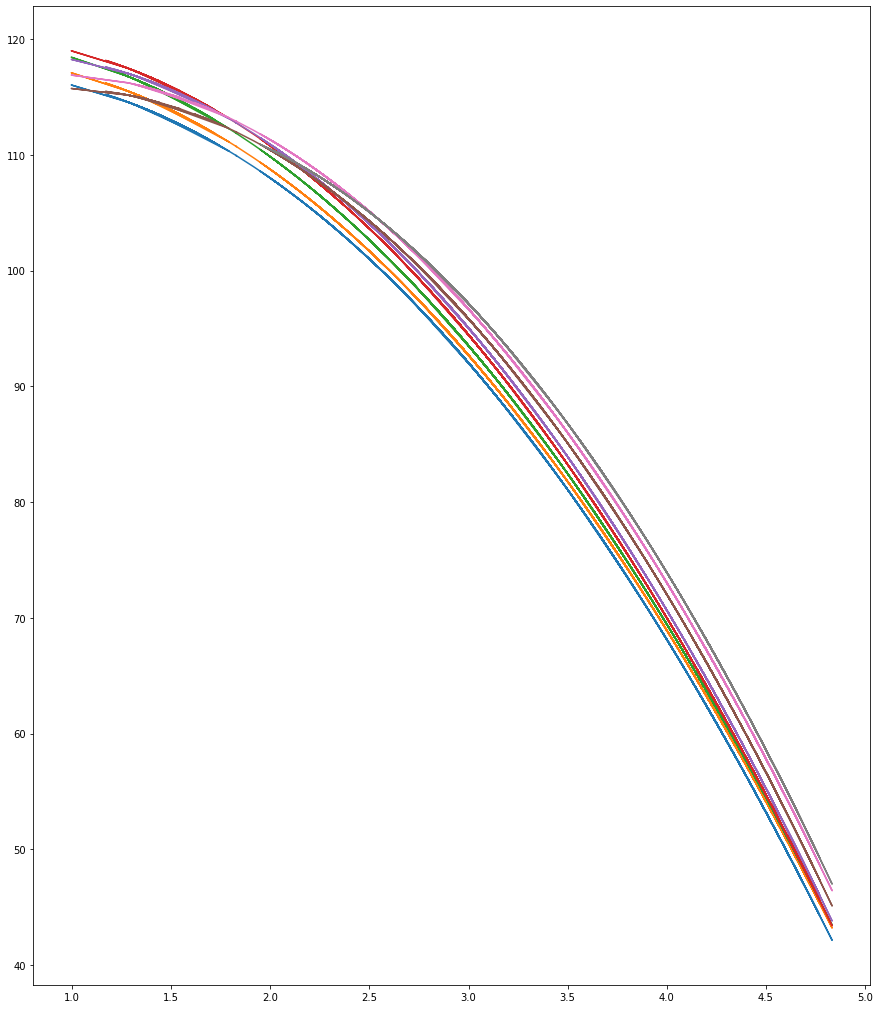

In [15]:
plt.rcParams["figure.figsize"] = (15,18)
for lagg in range (1,225, 30):
    plotplinomial2_regression(df[['US30Y']][:-lagg].values, df['IVE'][lagg:].values)

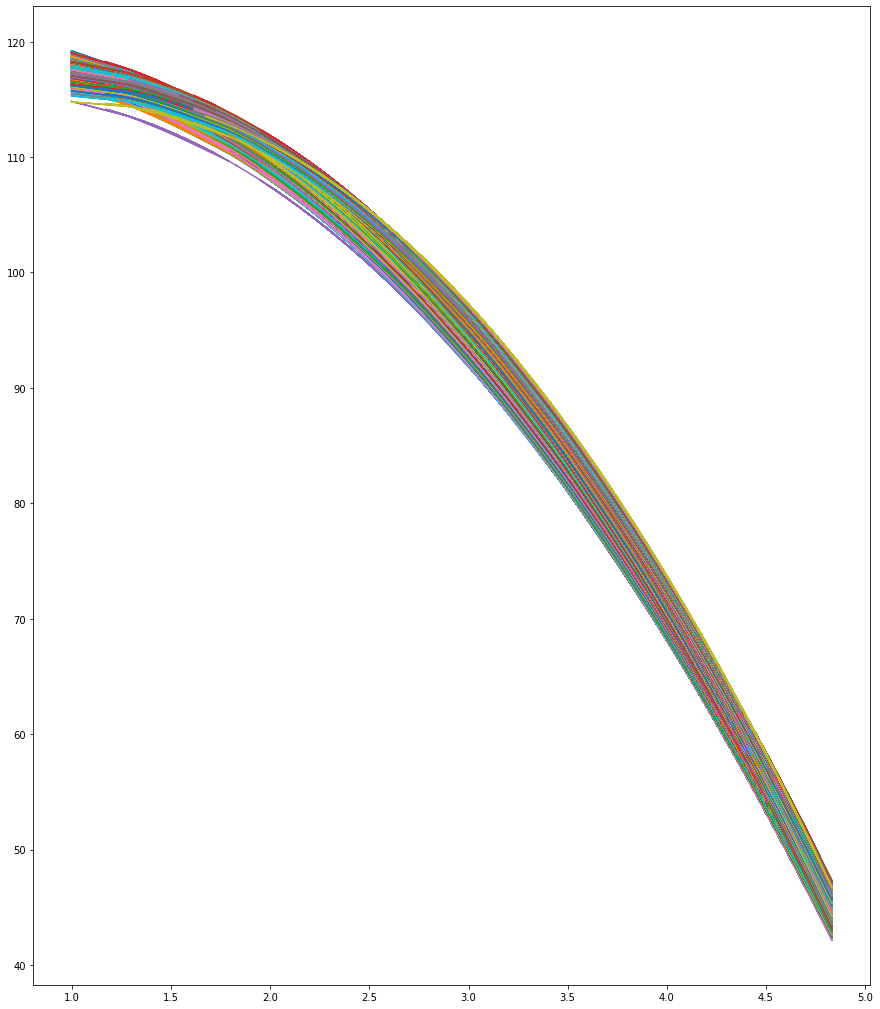

In [16]:
plt.rcParams["figure.figsize"] = (15,18)
for lagg in range (1,200):
    plotplinomial2_regression(df[['US30Y']][:-lagg].values, df['IVE'][lagg:].values)